In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

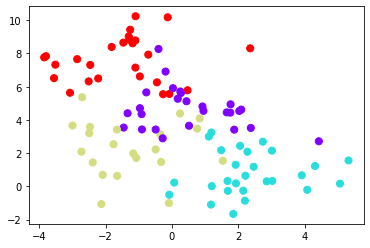

(100, 2)
(4900, 2)
4


In [2]:
[X_train, y_train, X_test, y_test] = np.load("TP5a.npy",allow_pickle=True) 
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='rainbow') 
plt.show()

print(X_train.shape)
print(X_test.shape)
print(max(y_train)-min(y_train)+1)

In [3]:
def visualize_classifier(model, X, y):
    ax = plt.gca()
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='rainbow',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', zorder=1)
    ax.set(xlim=xlim, ylim=ylim)
    plt.show()

max depth =  1
0.483265306122449


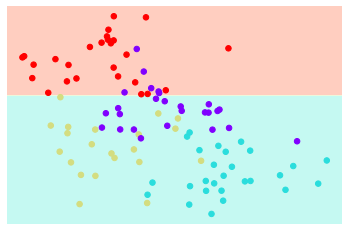

max depth =  2
0.6118367346938776


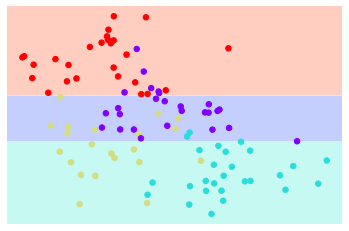

max depth =  3
0.6997959183673469


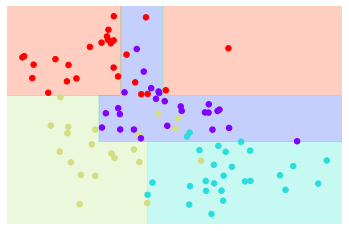

max depth =  4
0.7344897959183674


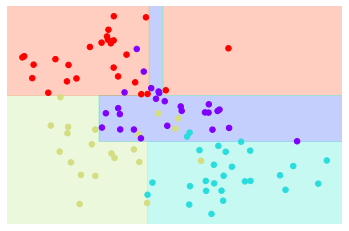

max depth =  5
0.6904081632653061


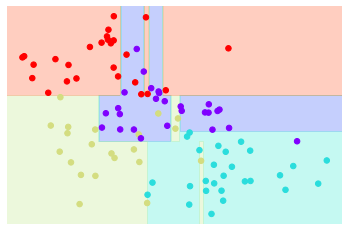

max depth =  6
0.7291836734693877


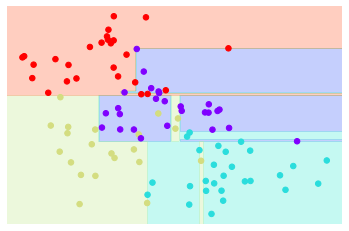

max depth =  7
0.726326530612245


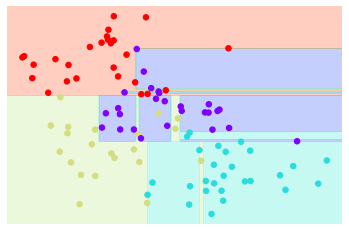

max depth =  8
0.7361224489795918


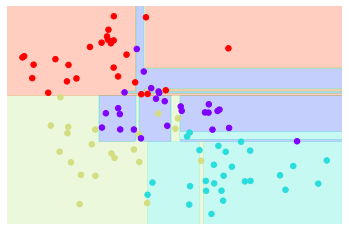

max depth =  9
0.6924489795918367


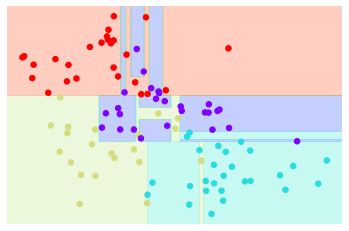

max depth =  10
0.696530612244898


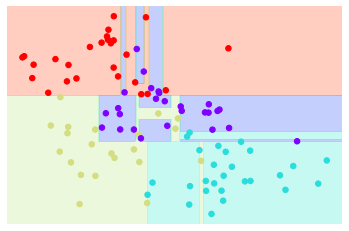

max depth =  11
0.696530612244898


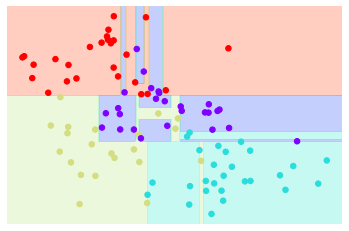

max depth =  12
0.7153061224489796


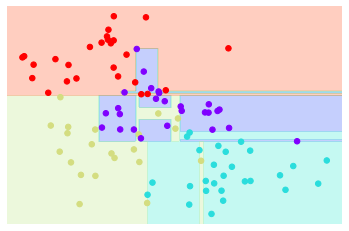

max depth =  13
0.7051020408163265


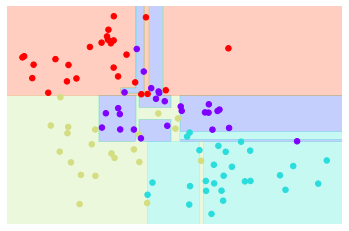

max depth =  14
0.7216326530612245


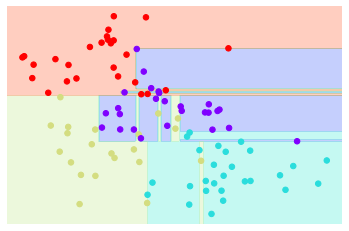

max depth =  15
0.7051020408163265


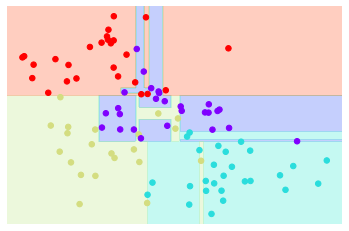

max depth =  16
0.7157142857142857


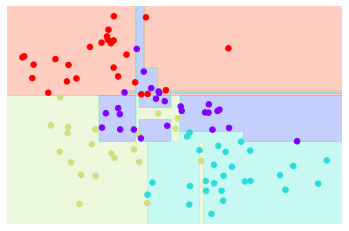

max depth =  17
0.7057142857142857


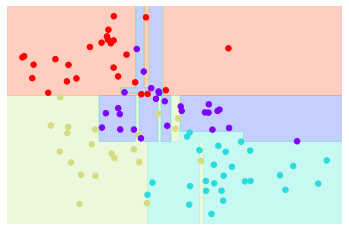

max depth =  18
0.7112244897959183


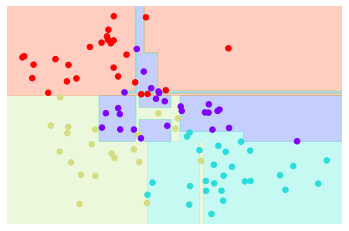

max depth =  19
0.7061224489795919


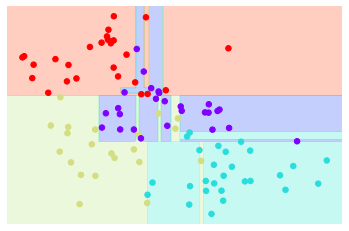

max depth =  20
0.7159183673469388


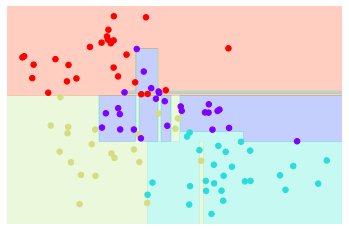

In [4]:
p=[]
for m in range (1,21,1):
  tree = DecisionTreeClassifier(criterion='entropy',max_depth = m) 
  tree.fit(X_train, y_train)
  print('max depth = ', m)
  y_pred = tree.predict(X_test)
  print(accuracy_score(y_test, y_pred))  
  visualize_classifier(tree, X_train, y_train)
  p.append(accuracy_score(y_test, y_pred))

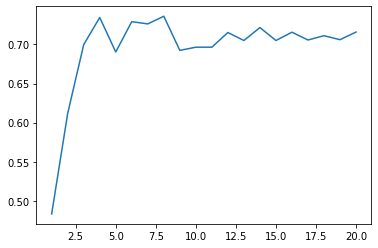

In [5]:
plt.plot(np.arange(1,21,1),p)
plt.show()

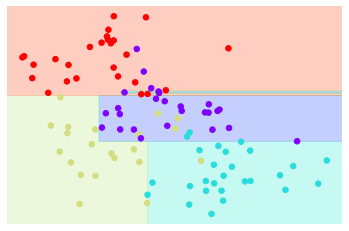

[[ 772  127   85  240]
 [ 148  977   97    1]
 [ 302  102  774   51]
 [  55    0   31 1138]]
0.7471428571428571
0.7471428571428571
              precision    recall  f1-score   support

           0       0.60      0.63      0.62      1224
           1       0.81      0.80      0.80      1223
           2       0.78      0.63      0.70      1229
           3       0.80      0.93      0.86      1224

    accuracy                           0.75      4900
   macro avg       0.75      0.75      0.74      4900
weighted avg       0.75      0.75      0.74      4900



In [6]:
tree2 = DecisionTreeClassifier(criterion='entropy',max_depth = 4) 
tree2.fit(X_train, y_train)
visualize_classifier(tree2, X_train, y_train)

y_pred = tree2.predict(X_test)
C=confusion_matrix(y_test, y_pred)
print(C)
print(np.sum(np.diag(C))/np.sum(C))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [7]:
[X_train2, y_train2, X_test2, y_test2] = np.load("TP5b.npy",allow_pickle=True)
print(X_train2.shape)
print(X_test2.shape)
print(max(y_train2)-min(y_train2)+1)

(966, 50)
(322, 50)
7


In [8]:
p2=[]
for m in range (1,21,1):
  tree2 = DecisionTreeClassifier(criterion='entropy',max_depth = m) 
  tree2.fit(X_train2, y_train2)
  print('max depth = ', m)
  y_pred2 = tree2.predict(X_test2)
  print(accuracy_score(y_test2, y_pred2)) 
  p2.append(accuracy_score(y_test2, y_pred2)) 

max depth =  1
0.453416149068323
max depth =  2
0.4658385093167702
max depth =  3
0.4472049689440994
max depth =  4
0.45962732919254656
max depth =  5
0.4906832298136646
max depth =  6
0.43478260869565216
max depth =  7
0.422360248447205
max depth =  8
0.453416149068323
max depth =  9
0.43167701863354035
max depth =  10
0.43478260869565216
max depth =  11
0.4440993788819876
max depth =  12
0.41304347826086957
max depth =  13
0.43167701863354035
max depth =  14
0.46273291925465837
max depth =  15
0.4440993788819876
max depth =  16
0.43167701863354035
max depth =  17
0.4409937888198758
max depth =  18
0.43788819875776397
max depth =  19
0.4440993788819876
max depth =  20
0.43167701863354035


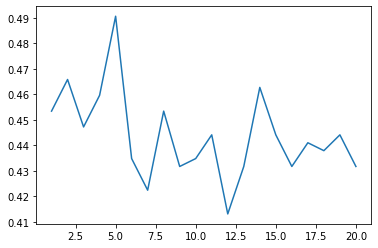

In [9]:
plt.plot(np.arange(1,21,1),p2)
plt.show()

In [10]:
from sklearn.ensemble import RandomForestClassifier 

RF = RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=1) 
RF.fit(X_train2, y_train2)
y_pred = RF.predict(X_test2)
print(accuracy_score(y_test2, y_pred))

0.6708074534161491


In [11]:
# from sklearn.model_selection import GridSearchCV
# parameters = {'criterion':('gini', 'entropy'),'n_estimators':[100,120,130,180,150,200],'max_depth':[10,12,15,20]}
# clf = GridSearchCV(RF, parameters)
# clf.fit(X_train2, y_train2)
# print(clf.best_params_)

In [12]:
RF = RandomForestClassifier(criterion='entropy',max_features= 0.5, n_estimators=300,max_depth =6) 
RF.fit(X_train2, y_train2)
y_pred = RF.predict(X_test2)
print(accuracy_score(y_test2, y_pred))

0.6677018633540373


In [16]:
print(len(np.unique(y_test2)))

7
